# Activity 2.1 : Convolutional Neural Network

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2025-2026
  |  
<u>**Hands-on Activity 3.1** | Convolutional Neural Network
**Name** | Corpuz, Micki Laurren B.
**Section** | CPE32S3
**Date Performed**: | 08 February 2026
**Date Submitted**: | 08 February 2026
**Instructor**: | Engr. Neal Barton James Matira

<hr>

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 16s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


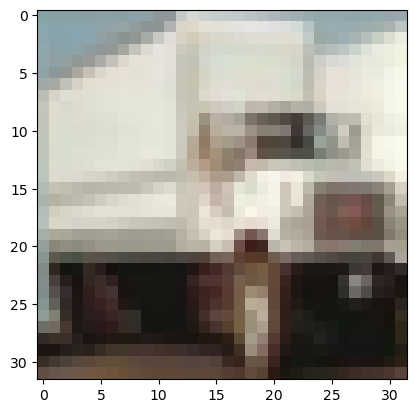

In [10]:
print(y_train[444])
plt.imshow(x_train[444]);

In [11]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [12]:
y_train[444]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Convert to float and scale the datasets

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [14]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_5 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 32)          0         
                                                      

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15



1563/1563 [==============================] - 9s 5ms/step - loss: 1.7094 - accuracy: 0.3784 - val_loss: 1.4466 - val_accuracy: 0.4861
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4465 - accuracy: 0.4811 - val_loss: 1.2843 - val_accuracy: 0.5472
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3595 - accuracy: 0.5156 - val_loss: 1.2812 - val_accuracy: 0.5530
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3102 - accuracy: 0.5385 - val_loss: 1.3132 - val_accuracy: 0.5501
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2852 - accuracy: 0.5460 - val_loss: 1.2439 - val_accuracy: 0.5689
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2708 - accuracy: 0.5605 - val_loss: 1.2504 - val_accuracy: 0.5718
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2567 - accuracy: 0.5654 - val_loss: 1.1807 - val_accuracy: 0.5971
Epo

#### Supplementary Activity

> Achieve at least 90% Accuracy

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

#### Conclusion

#type your answer here